# **Importing the needed initial libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Exploring the general information inside the dataset**
---

Column information from forestfires.csv:
   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 


In [ ]:
#importing the dataset
df = pd.read_csv('/content/forestfires.csv')

In [ ]:
#Checking the general info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
#Statistical summary of each columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


# **EXPLORATORY DATA ANALYSIS**



*   Univariate
*   Bivariate
*   Multivariate









*Univariate Analysis*

**Area (in hectares), our independent variable**





Text(0.5, 0, 'area (ha)')

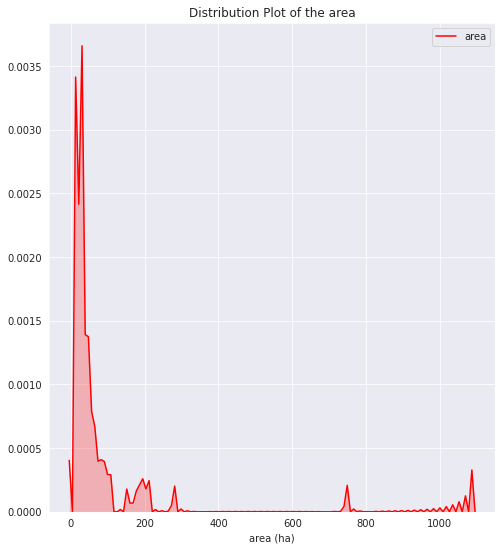

In [ ]:
#Plotting the distribution of the area
plt.figure(figsize=(8,9))
sns.set_style('darkgrid')
sns.kdeplot(df['area'], shade=True, c='r')
plt.title('Distribution Plot of the area')
plt.xlabel('area (ha)')

In [ ]:
#Skewness and kurtosis of the area
print('Skewness: %f' % df['area'].skew())
print('Kurtosis: %f' % df['area'].kurtosis())

Skewness: 12.846934
Kurtosis: 194.140721


In [ ]:
#Outliers
#We'll treat values more than 3 sd from the mean
areastd = df['area'].std()
areamean = df['area'].mean()
thres = (3*areastd)+areamean
df[df['area']>thres]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53


In [ ]:
#Observations:
#The area is indeed positively skewed and has a large kurtosis
#Most of the burnt areas cover only 0-50 hectares of land
#We can see some spikes along 1000th+ hectares
#There are 4 outliers from the area data

**Day and Month**





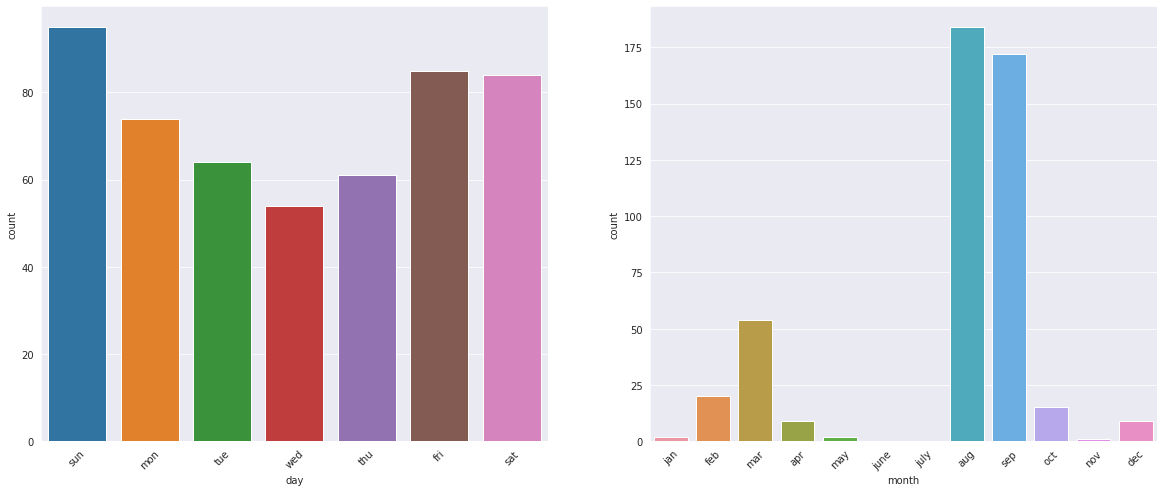

In [ ]:
gs, axes = plt.subplots(1,2, figsize=(20,8))
sns.set_style('dark')
sns.countplot(x='day', order=['sun','mon','tue','wed','thu','fri','sat'],data=df,ax=axes[0])
label1 = axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)
sns.countplot(x='month', order=['jan','feb','mar','apr','may','june','july','aug','sep','oct','nov','dec'],data=df,ax=axes[1])
label2 = axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)

In [ ]:
#Observations:
#There were significant amount of Forest fire during august and septemer
#there were very few counts of forest fire during the months of January, May, and Nov
#There were zero counts of forest fire during June-July
#Most forest fires occured on weekends (fri-sunday)

**Other Numerical features**

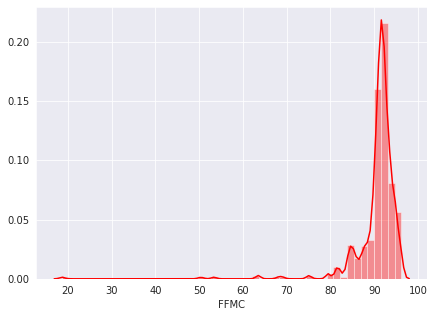

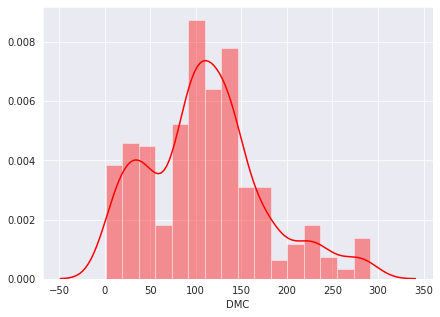

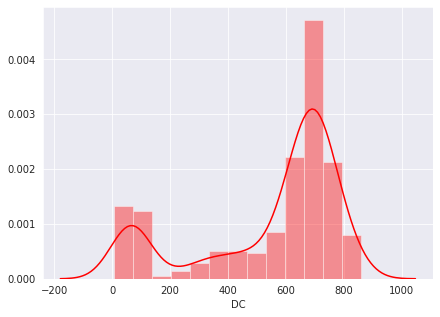

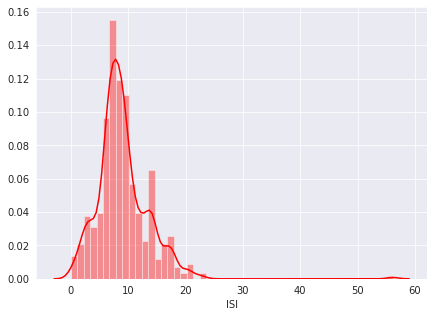

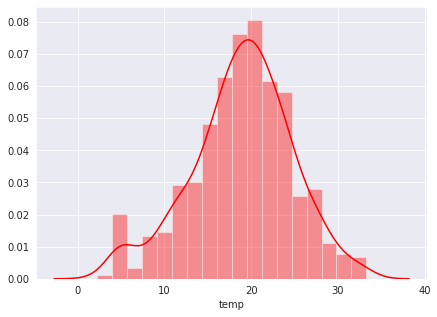

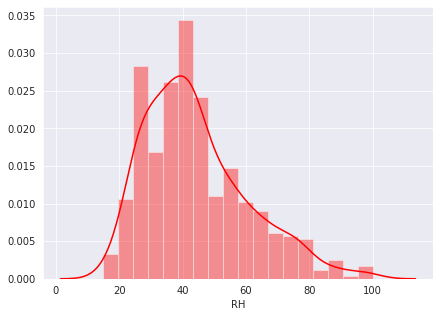

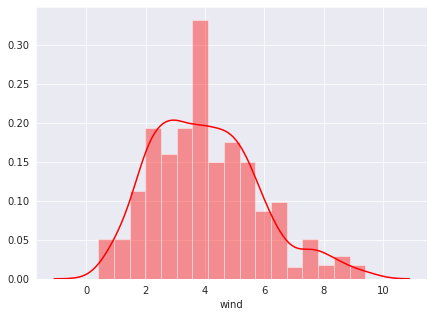

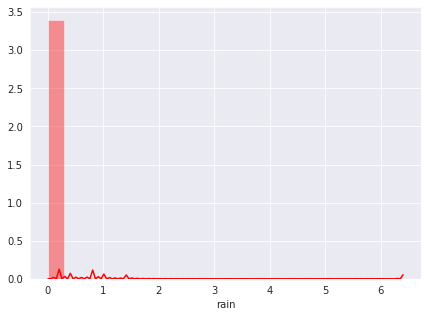

In [ ]:
#Distribution plots for the other features

for feature in df.columns[4:-1]:
  sns.set_style('darkgrid')
  plt.figure(figsize=(7,5))
  sns.distplot(df[feature], color='r')

In [ ]:
outliers = pd.DataFrame(columns=['FFMC'], index=['Number of Outliers'])
for feature in df.columns[4:-1]:
  std = df[feature].std()
  mean = df[feature].mean()
  thresr = (3*std) + mean
  thresl = mean - (3*std)
  outliers[feature] = df[(abs(df[feature]>thresr)) | (abs(df[feature]<thresl))].count()[0]
print(outliers.T)

      Number of Outliers
FFMC                   7
DMC                    0
DC                     0
ISI                    1
temp                   0
RH                     5
wind                   4
rain                   3


In [ ]:
#Forest fire often occured on not so cold temperature (20 degree celsius)
#Rain is also almost non existent in the data
#The wind also peaked at about 4 km/h
# There are a few outliers in the FFMC, ISI, temp, RH, wind, and rain columns

*Bivariate Analysis*

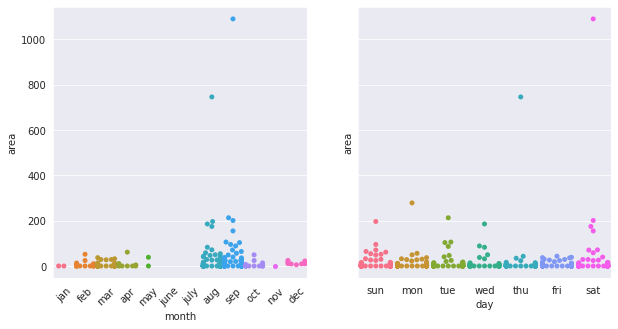

In [ ]:
g, axes = plt.subplots(1,2, sharey=True, figsize=(10,5))
sns.set_style('whitegrid')
sns.swarmplot(x='month',order=['jan','feb','mar','apr','may','june','july','aug','sep','oct','nov','dec'],y='area', data=df, palette='husl', ax=axes[0])
label1 = axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)
sns.swarmplot(x='day',order=['sun','mon','tue','wed','thu','fri','sat'],y='area', data=df, palette='husl', ax=axes[1])

In [ ]:
#The largest damage occured on august and september
#it occured on a thursday and saturday
#we can infer from this that it happened in warm months (september and august) in Montesinho Park, Portugal

Text(0, 0.5, 'y-axis spatial coordinate in Montesinho Park')

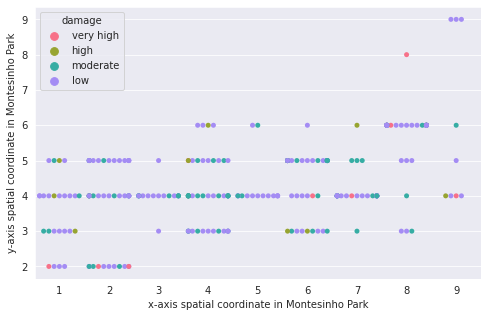

In [ ]:
dfwithdamagecat = df
plt.figure(figsize=(8,5))
dfwithdamagecat['damage'] = df['area'].apply(lambda x: 'low' if (x>0 and x<=10) else('moderate' if (x>10 and x<=50) else('high' if (x>50 and x<=100) else ('very high' if x>100 else 'no damage'))))
sns.set_style('darkgrid')
#filtering the areas with no damage
sns.swarmplot(x="X", y='Y', data=dfwithdamagecat[dfwithdamagecat['damage']!='no damage'], palette='husl', hue='damage', hue_order=['very high','high','moderate','low'])
plt.xlabel('x-axis spatial coordinate in Montesinho Park')
plt.ylabel('y-axis spatial coordinate in Montesinho Park')

In [ ]:
#We can see that forest fire often happened on the 4th and 5th y axis coordinate
#There were almost no forest fire happened on the bottom of the park and on the upper part
#Most forest fires damage are within 1-10 hectares of land

In [ ]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'damage'],
      dtype='object')

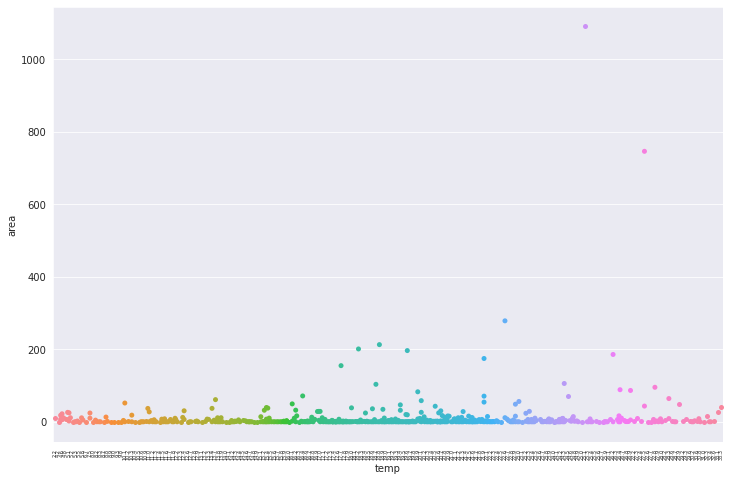

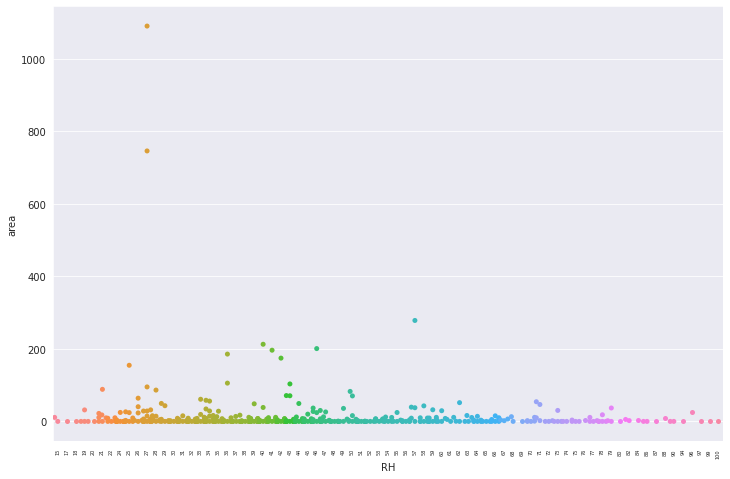

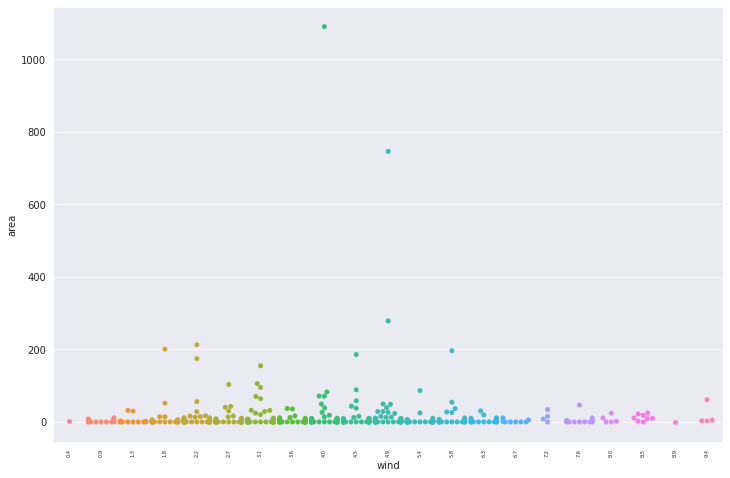

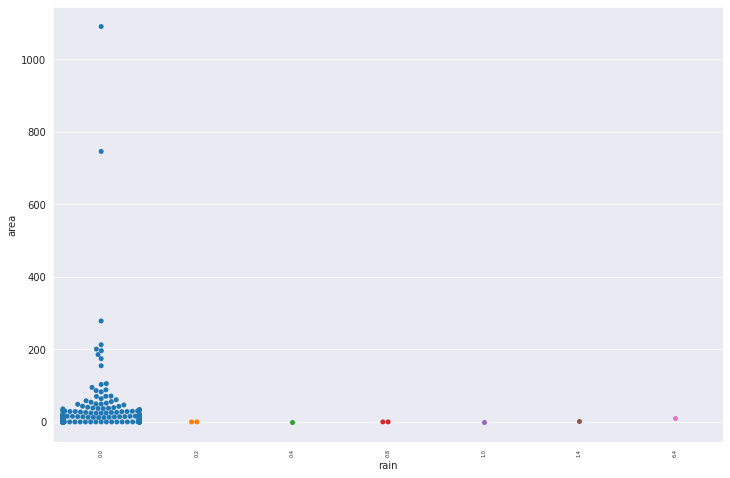

In [ ]:
for column in df.columns[8:12]:
  sns.set_style('darkgrid')
  plt.figure(figsize=(12,8))
  ax = sns.swarmplot(x=column,y='area',data=df)
  ax.set_xticklabels(ax.get_xticklabels(),rotation= 90, fontsize=5)

In [ ]:
#We can see that most fires happened in low humidity, low wind speed, no amount of rain which make perfect sense
#Also, high area of damage occured during the warm temperatures

*Multivariate Analsysis*

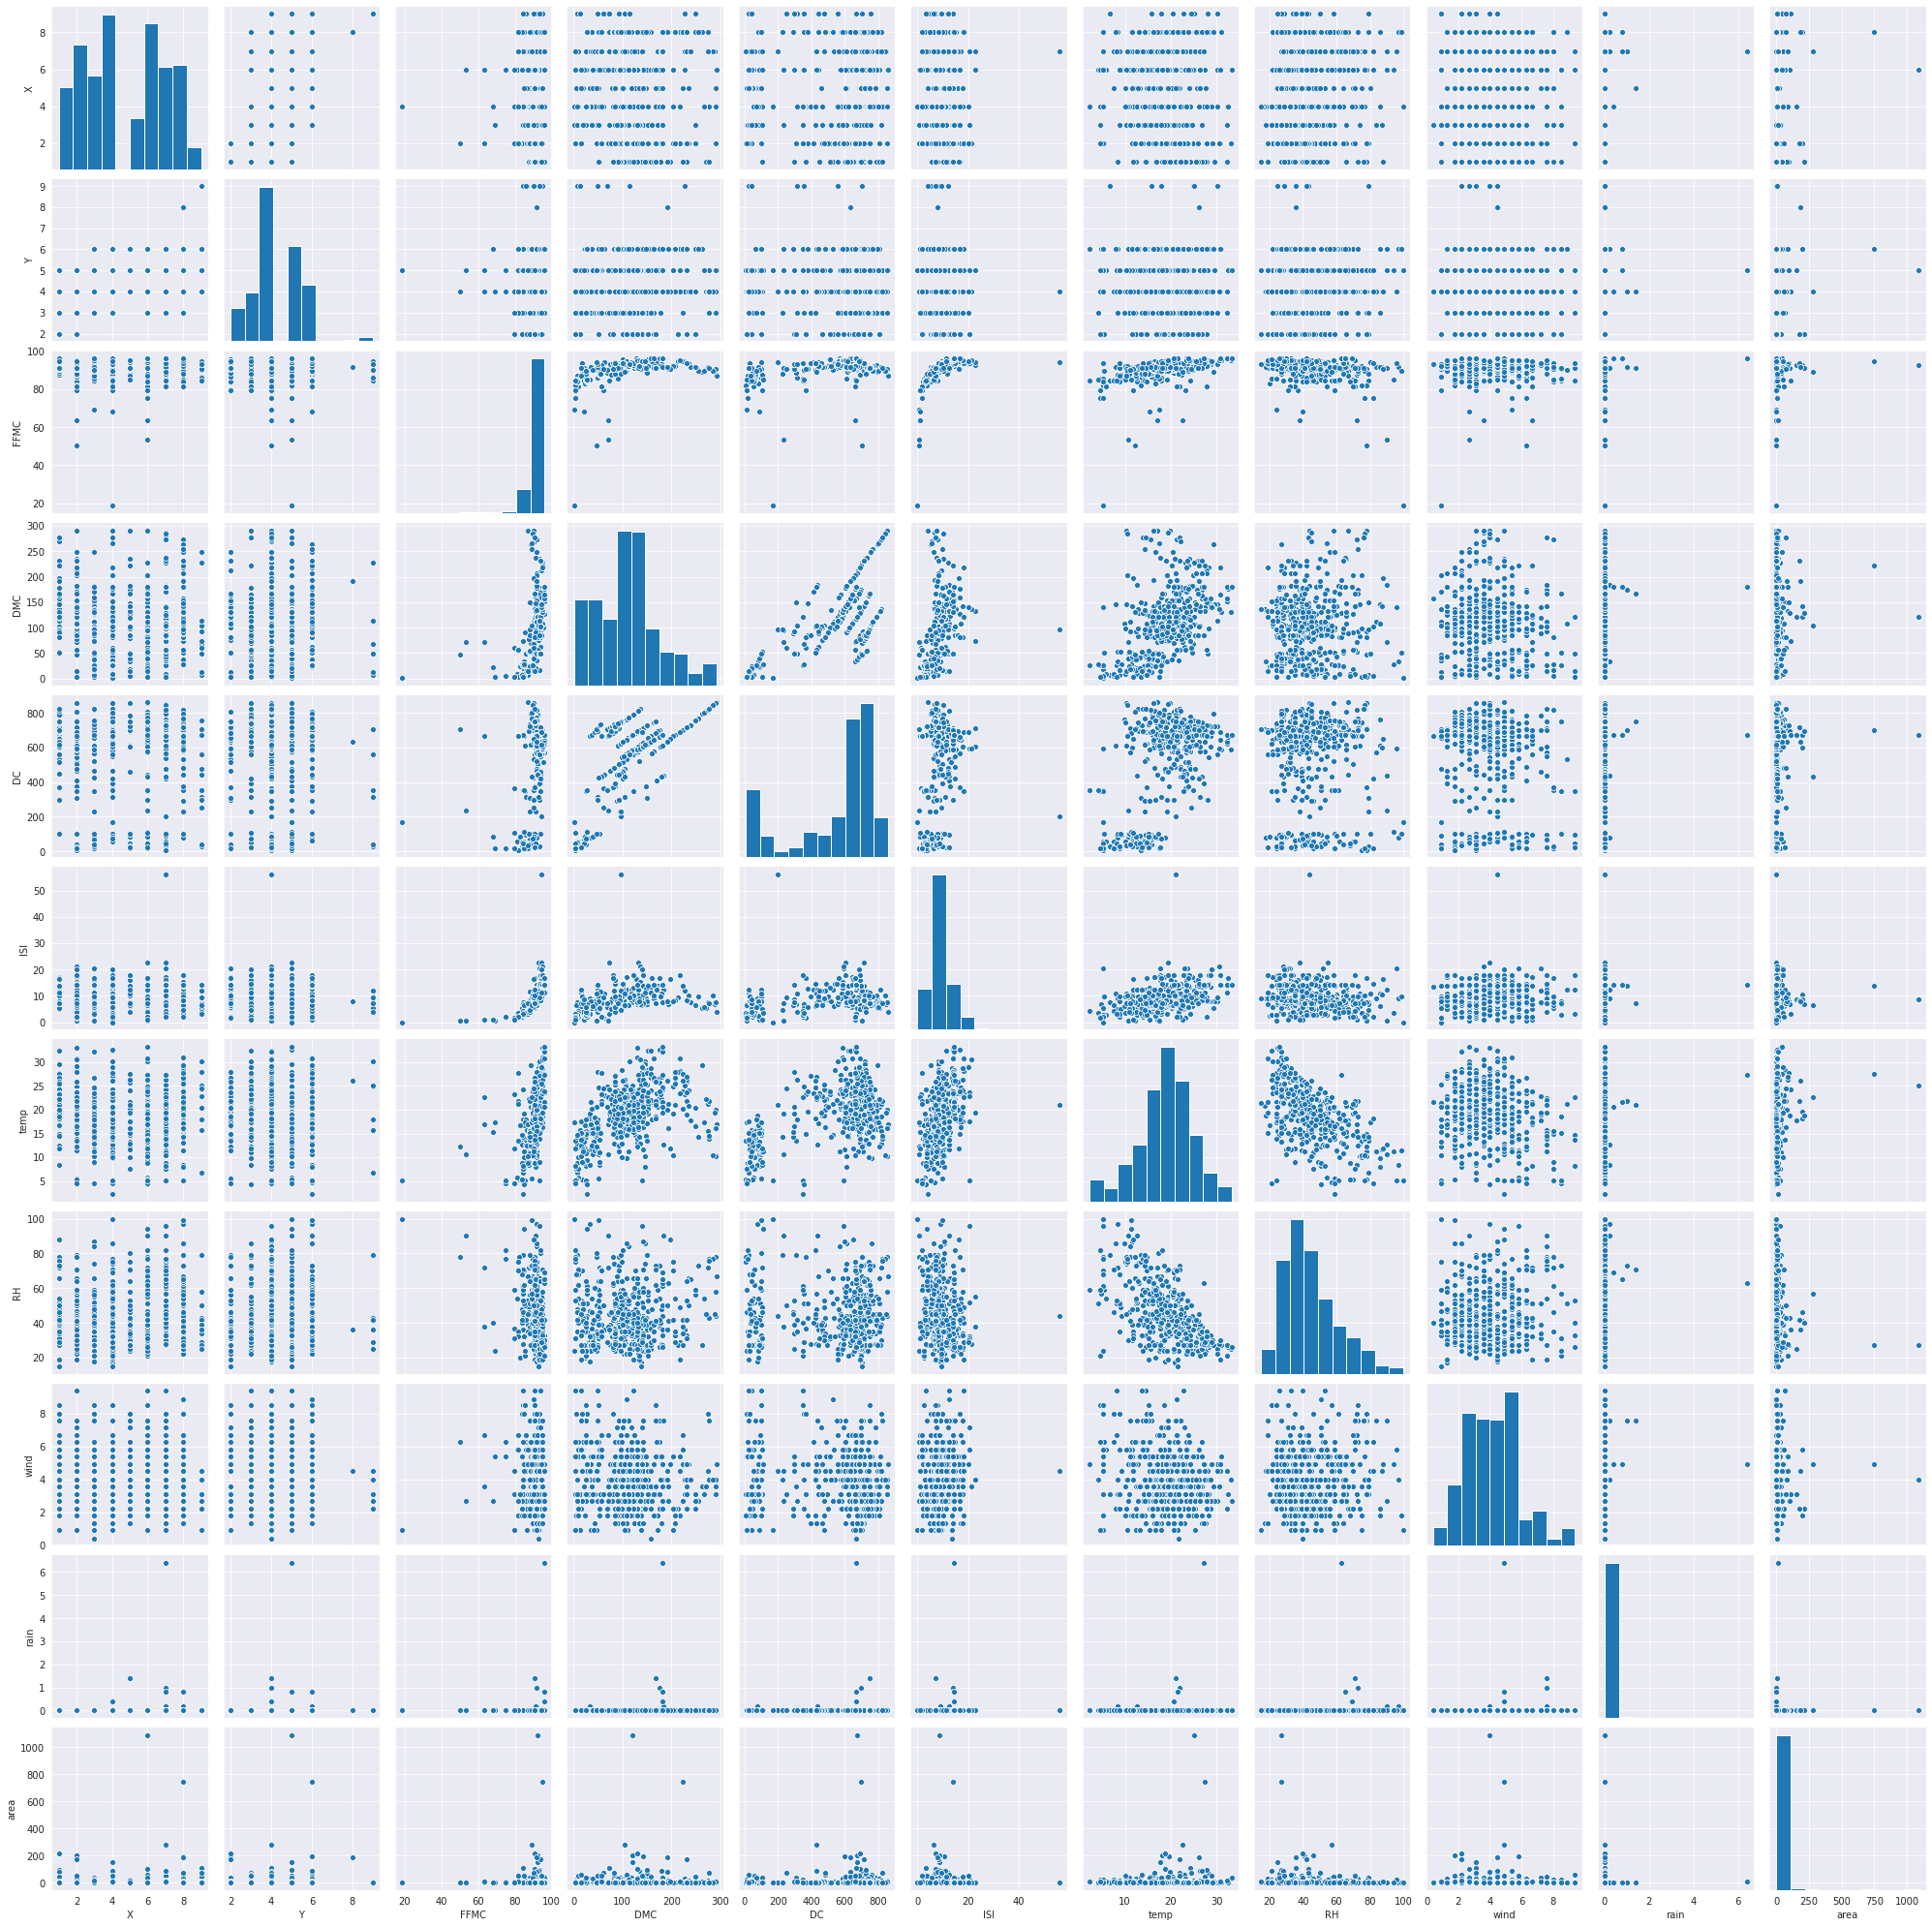

In [ ]:
sns.pairplot(df)

In [ ]:
# We can see that DC and DMC possess linear relationship

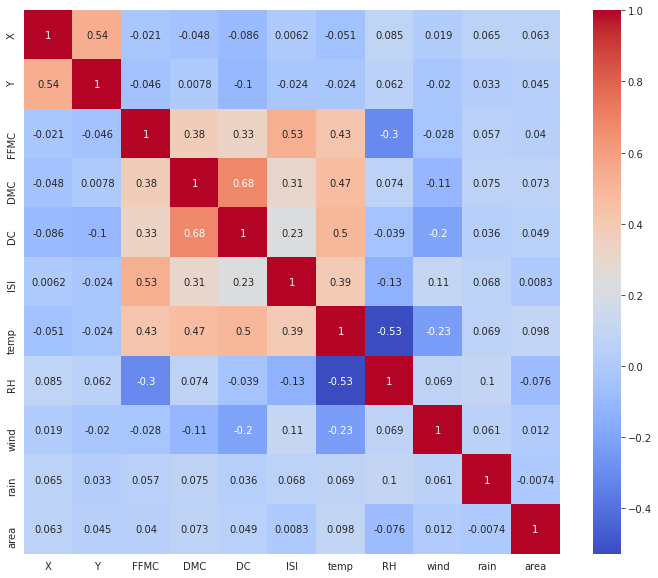

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [ ]:
#We can see that the index values from the FWI system have good correlation with each other

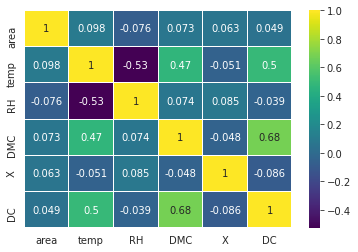

In [ ]:
#Top 5 highest correlation with our independent variable, area
sns.heatmap(df[abs(df.corr()['area']).nlargest(6).index].corr(),cmap='viridis', linecolor='w', linewidth= 0.1, annot=True)

In [ ]:
#We can say that the top 5 features that are correlated with our independent variable
#are: temp, RH, DMC, X, and DC
#Printing the correlation coeff of all the features with the area

df.corr()['area'].sort_values(ascending = False)

area    1.000000
temp    0.097844
DMC     0.072994
X       0.063385
DC      0.049383
Y       0.044873
FFMC    0.040122
wind    0.012317
ISI     0.008258
rain   -0.007366
RH     -0.075519
Name: area, dtype: float64

# **Missing Data**

In [ ]:
df.isnull().sum()

X         0
Y         0
month     0
day       0
FFMC      0
DMC       0
DC        0
ISI       0
temp      0
RH        0
wind      0
rain      0
area      0
damage    0
dtype: int64

In [ ]:
#There are no Missing values from the data

# **Skewness and Normalization**

In [ ]:
#Getting the skewed features with greater than 0.75 skewness
abs(df.skew())>1

X       False
Y       False
FFMC     True
DMC     False
DC       True
ISI      True
temp    False
RH      False
wind    False
rain     True
area     True
dtype: bool

In [ ]:
skewed_feat = ['FFMC','DC','ISI','rain','area']

In [ ]:
#All of the skewed features are positive values, we will use log(n+1) transformation for normalization

In [ ]:
df_norm = df.copy()
df_norm[skewed_feat] = np.log(df_norm[skewed_feat]+1)

In [ ]:
skewness = pd.concat([df_norm.skew(), df.skew()], axis=1)
print(skewness)

              0          1
X      0.036246   0.036246
Y      0.417296   0.417296
FFMC -11.675394  -6.575606
DMC    0.547498   0.547498
DC    -1.869202  -1.100445
ISI   -0.937218   2.536325
temp  -0.331172  -0.331172
RH     0.862904   0.862904
wind   0.571001   0.571001
rain  14.173028  19.816344
area   1.217838  12.846934


In [ ]:
#High Skewness stil remains from features FFMC and rain
#For rain feature, we will treat it as categorical feature since there are only 7 unique rain values and most of them are 0.0
df_norm['rain'].value_counts()
#For FFMC, we will remove the outlier

0.000000    509
0.587787      2
0.182322      2
0.693147      1
0.875469      1
0.336472      1
2.001480      1
Name: rain, dtype: int64

In [ ]:
df_norm['rain'] = df_norm['rain'].apply(lambda x: int(0) if x==0.0 else int(1))

In [ ]:
outlierFFMC = df_norm[df_norm['FFMC']<(df_norm['FFMC'].mean() -3*df_norm['FFMC'].std())]
df_norm.drop(outlierFFMC.index.tolist(),axis=0, inplace=True)
df_norm.reset_index(drop=True, inplace=True)
print(outlierFFMC.index.tolist())

[12, 97, 130, 199, 299, 312, 379]


In [ ]:
#Checking for skewness again...
df_norm.skew()

X       0.028048
Y       0.425940
FFMC   -1.803993
DMC     0.543167
DC     -1.888801
ISI    -0.434372
temp   -0.336207
RH      0.827583
wind    0.582634
rain    7.818265
area    1.208492
dtype: float64

# **Encoding the Categorical Features**

In [ ]:
df_new = pd.get_dummies(columns = ['day','month'], drop_first=True, data=df_norm)
x = df_new.drop(['area','damage'],axis=1)
y = df_new['area']


# **Modelling the Data**

In [ ]:
#fitting the chosen 3 regressor without hyperparameter tuning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
lr.fit(x, y)

cart = DecisionTreeRegressor(random_state=42)
cart.fit(x, y)


rf = RandomForestRegressor(random_state = 42)
rf.fit(x, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
# Evaluating the models using k fold cross validation
from sklearn.model_selection import cross_val_score

models = [lr,cart,rf]
model_names = ['Linear','CART','RandomForest']
index = ['RMSE Mean','RMSE std']
init_eval = pd.DataFrame(columns = model_names,index=index)
for i in range(0,3):
  init_eval[model_names[i]]['RMSE Mean'] = (cross_val_score(estimator = models[i], X=x, y=y, cv=10, scoring = 'neg_root_mean_squared_error')).mean() * -1
  init_eval[model_names[i]]['RMSE std'] = (cross_val_score(estimator = models[i], X=x, y=y, cv=10, scoring = 'neg_root_mean_squared_error')).std()

print(init_eval)

            Linear      CART RandomForest
RMSE Mean  1.50257   2.32424      1.63063
RMSE std   0.44963  0.338057     0.467835


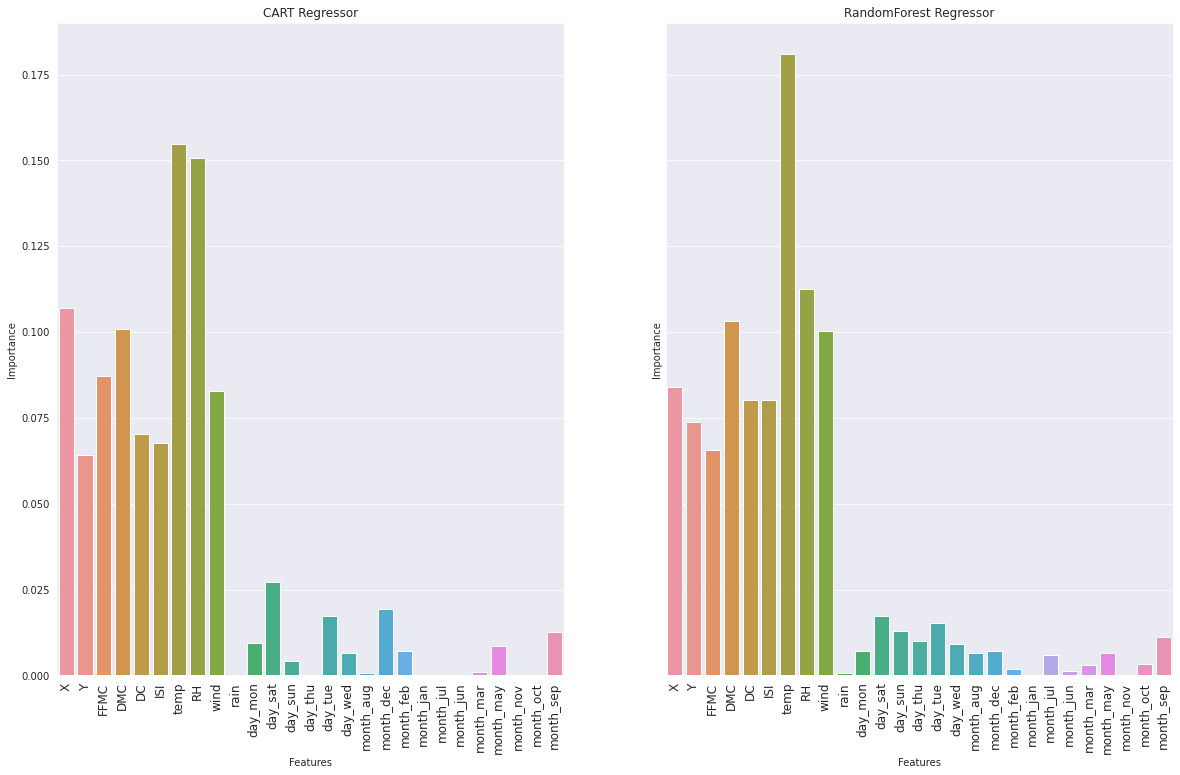

In [ ]:
g,axes = plt.subplots(1,2, figsize=(20,12), sharey=True)
sns.barplot(x=x.columns,y=cart.feature_importances_,ax=axes[0])
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Importance')
axes[0].set_title('CART Regressor')
label1= axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90,fontsize=12)
sns.barplot(x=x.columns,y=rf.feature_importances_,ax=axes[1])
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Importance')
axes[1].set_title('RandomForest Regressor')
label2= axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90,fontsize=12)



In [ ]:
#Based from the table above, we are not having a very good fit of these models
#We will try to eliminate some features using Backward elimination to try and improve the model

In [ ]:
import statsmodels.regression.linear_model as sm
xnew = x.copy()
#appending the constant value for the multiple linear regression formula
xnew['k'] = 1

In [ ]:
def backward_eliminator(array, values, significant_level=0.05):
    array_opt = array[:]
    while True:
        reg_two = sm.OLS(endog=values, exog=array_opt).fit()
        ssum = reg_two.summary()
        p_indexes = [float(x[4].data) for x in ssum.tables[1] if ssum.tables[1].index(x)>0]
        max_sig_level = max(p_indexes)
        if max_sig_level > significant_level:
            print('column removed: {}'.format(array_opt.columns[p_indexes.index(max_sig_level)]))
            array_opt.drop(array_opt.columns[p_indexes.index(max_sig_level)], axis=1, inplace=True)
            print(p_indexes.index(max_sig_level))

        else:
            return array_opt


xopt = backward_eliminator(xnew,y, significant_level=0.05)

column removed: Y
1
column removed: month_oct
24
column removed: k
25
column removed: FFMC
1
column removed: day_thu
11
column removed: month_sep
22
column removed: ISI
3
column removed: day_mon
7
column removed: month_feb
13
column removed: month_may
17
column removed: day_wed
10
column removed: day_sun
8
column removed: month_jan
11
column removed: month_nov
14
column removed: day_tue
8
column removed: day_sat
7
column removed: month_mar
11
column removed: DC
2
column removed: RH
3
column removed: month_jul
7
column removed: month_jun
7
column removed: rain
4
column removed: wind
3


In [ ]:
#Column Remained
xopt.columns

Index(['X', 'DMC', 'temp', 'month_aug', 'month_dec'], dtype='object')

In [ ]:
#Fitting the optimal features to our models
lr = LinearRegression()
lr.fit(xopt, y)

cart = DecisionTreeRegressor(random_state=42)
cart.fit(xopt, y)


rf = RandomForestRegressor(random_state = 42)
rf.fit(xopt, y)

# Evaluating the models using k fold cross validation
from sklearn.model_selection import cross_val_score

models = [lr,cart,rf]
model_names = ['Linear','CART','RandomForest']
index = ['RMSE Mean','RMSE std']
second_eval = pd.DataFrame(columns = model_names,index=index)
for i in range(0,3):
  second_eval[model_names[i]]['RMSE Mean'] = (cross_val_score(estimator = models[i], X=xopt, y=y, cv=10, scoring = 'neg_root_mean_squared_error')).mean() * -1
  second_eval[model_names[i]]['RMSE std'] = (cross_val_score(estimator = models[i], X=xopt, y=y, cv=10, scoring = 'neg_root_mean_squared_error')).std()

print(second_eval)

             Linear      CART RandomForest
RMSE Mean   1.41696     2.227      1.60424
RMSE std   0.434962  0.302888     0.410891


In [ ]:
print(init_eval)

            Linear      CART RandomForest
RMSE Mean  1.50257   2.32424      1.63063
RMSE std   0.44963  0.338057     0.467835


In [ ]:
#Based from the previous models, our new models now possess lower RMSE compared to the initial models


Text(0.5, 1.0, 'RandomForest Regressor')

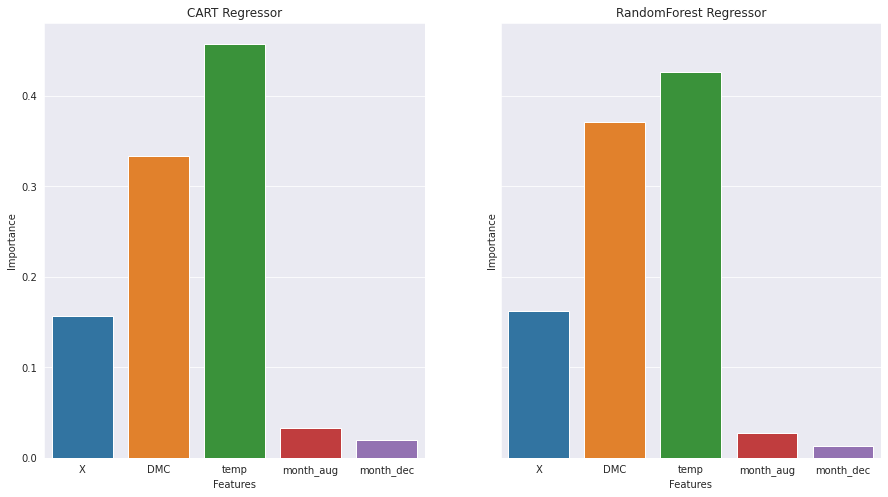

In [ ]:
g,axes = plt.subplots(1,2, figsize=(15,8), sharey=True)
sns.barplot(x=xopt.columns,y=cart.feature_importances_,ax=axes[0])
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Importance')
axes[0].set_title('CART Regressor')
sns.barplot(x=xopt.columns,y=rf.feature_importances_,ax=axes[1])
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Importance')
axes[1].set_title('RandomForest Regressor')


# **Tuning the hyperparameters**

In [ ]:
#Tuning the CART Regressor
from sklearn.model_selection import GridSearchCV 
cart2 = DecisionTreeRegressor(random_state=42)
cartparam = [{'max_features':[1,2,4,6,8,10], 'min_samples_split':[1,10,20,30,40]}]
gscart = GridSearchCV(estimator = cart2, param_grid=cartparam, scoring='neg_root_mean_squared_error',cv=10)
gscart.fit(xopt,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_features': [1, 2, 4, 6, 8, 10],
                          'min_samples_split': [1, 10, 20, 30, 40]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score

In [ ]:
#Tuning the RF Regeressor
rf2 = RandomForestRegressor(random_state=42,)
RFparam = [{'bootstrap': [True,False],'n_estimators':[40,50,60,70,100,200],'min_samples_split':[5,20,30,40],'max_features':[1,3,5]}]
gsrf = GridSearchCV(estimator = rf2, param_grid=RFparam, scoring='neg_root_mean_squared_error',cv=10)
gsrf.fit(xopt,y)


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [ ]:
third_eval = second_eval.copy()
third_eval['CART'] = [gscart.best_score_*-1, gscart.cv_results_['std_test_score'][gscart.best_index_]]
third_eval['RandomForest'] = [gsrf.best_score_*-1, gsrf.cv_results_['std_test_score'][gsrf.best_index_]]

In [ ]:
third_eval

,Linear,CART,RandomForest
RMSE Mean,1.41696,1.531086,1.456965
RMSE std,0.434962,0.450695,0.455044


In [ ]:
second_eval

,Linear,CART,RandomForest
RMSE Mean,1.41696,2.227,1.60424
RMSE std,0.434962,0.302888,0.410891


In [ ]:
init_eval

,Linear,CART,RandomForest
RMSE Mean,1.50257,2.32424,1.63063
RMSE std,0.44963,0.338057,0.467835


In [ ]:
#We definitely improved our RMSE by tuning the hyperparameters of RF and CART Regressor

# **Stacking the Base Models to improve the RMSE**

In [ ]:
#Creating the features matrix from the base models
base_models = [lr, gscart.best_estimator_,gsrf.best_estimator_]
finalx = pd.DataFrame(columns = ['Linear','CART','RF'])
for i in range(0,3):
  finalx[finalx.columns[i]]=base_models[i].predict(xopt)

In [ ]:
#Checking the head of our final features
finalx.head()

,Linear,CART,RF
0,0.852357,1.175855,0.957137
1,1.098158,1.215587,0.818414
2,1.037692,1.816110,1.171815
3,0.911133,1.175855,0.933735
4,1.021466,1.816110,1.108724


In [ ]:
#Using the XGBRegressor for our final regression
from xgboost import XGBRegressor

#Tuning the XGBRegressor
xgb = XGBRegressor(random_state = 42, verbose=False)
xgbparams = [{'max_depth':[5,4,3],'learning_rate':[0.1,0.05,0.001, 0.005], 'n_estimators':[10,20,50,100,150],'booster':['gbtree','gblinear']}]


In [ ]:
gsxgb = GridSearchCV(estimator = xgb, param_grid=xgbparams, scoring='neg_root_mean_squared_error',cv=10,verbose=False)
gsxgb.fit(finalx,y)

[06:03:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:03:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:03:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:03:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:03:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:03:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:03:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:03:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=42,
                                    reg_alpha=0, re...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbose=False, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid=[{'booster': ['gbtree', 'gblinear'],
                          'learning_rate': [0.1, 0.05, 0.001, 

In [ ]:
final_eval = third_eval.copy()
final_eval['XGBRegressor (2nd level)'] = [gsxgb.best_score_*-1, gsxgb.cv_results_['std_test_score'][gsxgb.best_index_]]

print(final_eval)

             Linear      CART  RandomForest  XGBRegressor (2nd level)
RMSE Mean   1.41696  1.531086      1.456965                  1.159900
RMSE std   0.434962  0.450695      0.455044                  0.410563


In [ ]:
#Our final RMSE for our 2nd level regressor yields 1.15990 RMSE! 

Text(0.5, 1.0, 'XGB Regressor')

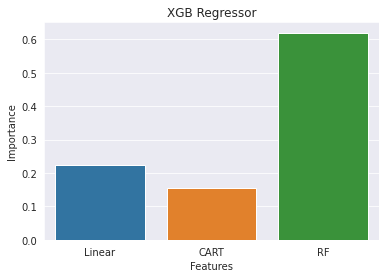

In [ ]:
#Graphing the feature importances of our new meta model
g = sns.barplot(x=finalx.columns,y=gsxgb.best_estimator_.feature_importances_)
g.set_xlabel('Features')
g.set_ylabel('Importance')
g.set_title('XGB Regressor')


In [ ]:
#Random Forest regressor made the biggest influence to our meta model